In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import os
from scipy import stats
import seaborn as sns

In [4]:
pd.set_option('display.max_columns',300)

In [5]:
dados = []
for elem in os.listdir('json'):
    if 'json' in elem:
        dados.append(json.loads(open(os.path.join('json', elem),encoding='utf-8').read()) )
                 

In [6]:
colunas_nivel = ['tempoParado',
    'tempoMovimentando',
    'tempoAtirando',
    'tempoRecarregando',
    'tempoSliding',
    'tempoDash',
    'tempoPulando',
    'tempoCaindo',
    'tempoAgachado',
    'quantidadeTiros',
    'quantidadeTirosAcertados',
    'quantidadeTirosAcertadosCausandoDano',
    'quantidadeTirosAcertadosSemCausarDano',
    'quantidadeTirosErrados',
    'quantidadeAgachado',
    'quantidadePulos',
    'quantidadeDash',
    'quantidadeReloadApertando',
    'quantidadeReloadAuto',
    'distanciaPercorrida']

In [7]:
def parseiaNivelColuna(dados_json):

    dict_compl =  {}
    
    for nivel in dados_json['niveis']:
        dict_nivel = {}
        id_nivel = str(nivel['ID'])
        usou_cheat = [ nivel['cheat'] ] 
        
        
        
        dict_nivel['usou_cheat_'+ id_nivel] = usou_cheat
        dict_nivel['nota_dificuldade_' + id_nivel] = [nivel['notaDificuldade']]
        dict_nivel['dificuldade_apropriada_' + id_nivel] = [nivel['difuldadeApropriada']]
        dict_nivel['nivelTedioso_' + id_nivel] = [nivel['nivelTedioso']]
        dict_nivel['nivelDivertido_' + id_nivel] = [nivel['nivelDivertido']]
        dict_nivel['nivelFrustrante_' + id_nivel] = [nivel['nivelFrustrante']]
        dict_nivel['tempoTotal_' + id_nivel] = [nivel['tempoTotal']]
        dict_nivel['quantidadeMortes_' + id_nivel ] = [nivel['quantidadeMortes']]
         
        if not usou_cheat:
            #print(str(nivel['cheat']) + id_nivel)
            for column in colunas_nivel:
                #print(nivel['dadosAntesMorrer'][-1][column])
                dict_nivel[column + '_' + 'nvl_' + id_nivel] = [ nivel['dadosAntesMorrer'][-1][column] ]
        else:
            """
            encontra a melhor tentativa , a melhor tentativa foi 
            definida nos casos em que a pessoa não consegue passar
            como aquela em que o jogador conseguiu derrotar o maior número de inimigos.
            """
            
            melhor_tentativa = 0
            melhor_ini_derrotados = 0
            for i,tentativa in enumerate(nivel['dadosAntesMorrer']):
                if (len(tentativa['inimigosDerrotados']) > melhor_ini_derrotados):
                    melhor_ini_derrotados = len(tentativa['inimigosDerrotados'])
                    melhor_tentativa = i

            for column in colunas_nivel:
                dict_nivel[column + '_' + 'nvl_' + id_nivel] = [ nivel['dadosAntesMorrer'][melhor_tentativa][column] ] 

        #print(dict_nivel)
        dict_compl = {**dict_compl , **dict_nivel}

    #print(dict_compl)
    df_nivel = pd.DataFrame(dict_compl)
    
    return df_nivel

In [8]:
def parserDados(data):
    """ Recebe o json dos dados do teste e cria um dataFrame com todos os dados."""
    df  = []
    data.keys()
    #print ({key : [value] for key,value in (data['questionarioInicial']).items() })
    
    df_quest_inic = pd.DataFrame({'inicial_' + key : [value] for key,value in (data['questionarioInicial']).items() } )
    df_quest_final = pd.DataFrame({'final_' + key : [value] for key,value in (data['questionarioFinal']).items() } )
    df_nivel = parseiaNivelColuna(data)
    
    
    
    
    
    
    df = pd.concat([df_quest_inic, df_quest_final, df_nivel], sort=True, axis=1)
    return df


dados_experimento = []
#print(type(dados_experimento))
for dado in dados:
    df_aux = parserDados(dado)  
    dados_experimento.append(df_aux)
    

df_final = pd.concat(dados_experimento).reset_index(drop=True)



In [16]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

In [11]:
df_final.head(3)

,inicial_idade,inicial_sexo,inicial_q3,inicial_q4,inicial_q5,inicial_q6,inicial_q7,inicial_q8,inicial_q9_a,inicial_q9_b,inicial_q9_c,inicial_q9_d,final_q1_a,final_q1_b,final_q1_c,final_q1_d,final_q1_e,final_q1_f,final_q2,final_q3_a,final_q3_b,final_q3_c,final_q4_a,final_q4_b,final_q4_c,final_q4_d,final_q4_e,final_q4_f,final_q5_a,final_q5_b,final_q5_c,final_q5_d,final_q5_e,final_q5_f,final_q5_g,final_q5_h,usou_cheat_0,nota_dificuldade_0,dificuldade_apropriada_0,nivelTedioso_0,nivelDivertido_0,nivelFrustrante_0,tempoTotal_0,quantidadeMortes_0,tempoParado_nvl_0,tempoMovimentando_nvl_0,tempoAtirando_nvl_0,tempoRecarregando_nvl_0,tempoSliding_nvl_0,tempoDash_nvl_0,tempoPulando_nvl_0,tempoCaindo_nvl_0,tempoAgachado_nvl_0,quantidadeTiros_nvl_0,quantidadeTirosAcertados_nvl_0,quantidadeTirosAcertadosCausandoDano_nvl_0,quantidadeTirosAcertadosSemCausarDano_nvl_0,quantidadeTirosErrados_nvl_0,quantidadeAgachado_nvl_0,quantidadePulos_nvl_0,quantidadeDash_nvl_0,quantidadeReloadApertando_nvl_0,quantidadeReloadAuto_nvl_0,distanciaPercorrida_nvl_0,usou_cheat_1,nota_dificuldade_1,dificuldade_apropriada_1,nivelTedioso_1,nivelDivertido_1,nivelFrustrante_1,tempoTotal_1,quantidadeMortes_1,tempoParado_nvl_1,tempoMovimentando_nvl_1,tempoAtirando_nvl_1,tempoRecarregando_nvl_1,tempoSliding_nvl_1,tempoDash_nvl_1,tempoPulando_nvl_1,tempoCaindo_nvl_1,tempoAgachado_nvl_1,quantidadeTiros_nvl_1,quantidadeTirosAcertados_nvl_1,quantidadeTirosAcertadosCausandoDano_nvl_1,quantidadeTirosAcertadosSemCausarDano_nvl_1,quantidadeTirosErrados_nvl_1,quantidadeAgachado_nvl_1,quantidadePulos_nvl_1,quantidadeDash_nvl_1,quantidadeReloadApertando_nvl_1,quantidadeReloadAuto_nvl_1,distanciaPercorrida_nvl_1,usou_cheat_2,nota_dificuldade_2,dificuldade_apropriada_2,nivelTedioso_2,nivelDivertido_2,nivelFrustrante_2,tempoTotal_2,quantidadeMortes_2,tempoParado_nvl_2,tempoMovimentando_nvl_2,tempoAtirando_nvl_2,tempoRecarregando_nvl_2,tempoSliding_nvl_2,tempoDash_nvl_2,tempoPulando_nvl_2,tempoCaindo_nvl_2,tempoAgachado_nvl_2,quantidadeTiros_nvl_2,quantidadeTirosAcertados_nvl_2,quantidadeTirosAcertadosCausandoDano_nvl_2,quantidadeTirosAcertadosSemCausarDano_nvl_2,quantidadeTirosErrados_nvl_2,quantidadeAgachado_nvl_2,quantidadePulos_nvl_2,quantidadeDash_nvl_2,quantidadeReloadApertando_nvl_2,quantidadeReloadAuto_nvl_2,distanciaPercorrida_nvl_2,usou_cheat_3,nota_dificuldade_3,dificuldade_apropriada_3,nivelTedioso_3,nivelDivertido_3,nivelFrustrante_3,tempoTotal_3,quantidadeMortes_3,tempoParado_nvl_3,tempoMovimentando_nvl_3,tempoAtirando_nvl_3,tempoRecarregando_nvl_3,tempoSliding_nvl_3,tempoDash_nvl_3,tempoPulando_nvl_3,tempoCaindo_nvl_3,tempoAgachado_nvl_3,quantidadeTiros_nvl_3,quantidadeTirosAcertados_nvl_3,quantidadeTirosAcertadosCausandoDano_nvl_3,quantidadeTirosAcertadosSemCausarDano_nvl_3,quantidadeTirosErrados_nvl_3,quantidadeAgachado_nvl_3,quantidadePulos_nvl_3,quantidadeDash_nvl_3,quantidadeReloadApertando_nvl_3,quantidadeReloadAuto_nvl_3,distanciaPercorrida_nvl_3,usou_cheat_4,nota_dificuldade_4,dificuldade_apropriada_4,nivelTedioso_4,nivelDivertido_4,nivelFrustrante_4,tempoTotal_4,quantidadeMortes_4,tempoParado_nvl_4,tempoMovimentando_nvl_4,tempoAtirando_nvl_4,tempoRecarregando_nvl_4,tempoSliding_nvl_4,tempoDash_nvl_4,tempoPulando_nvl_4,tempoCaindo_nvl_4,tempoAgachado_nvl_4,quantidadeTiros_nvl_4,quantidadeTirosAcertados_nvl_4,quantidadeTirosAcertadosCausandoDano_nvl_4,quantidadeTirosAcertadosSemCausarDano_nvl_4,quantidadeTirosErrados_nvl_4,quantidadeAgachado_nvl_4,quantidadePulos_nvl_4,quantidadeDash_nvl_4,quantidadeReloadApertando_nvl_4,quantidadeReloadAuto_nvl_4,distanciaPercorrida_nvl_4,usou_cheat_5,nota_dificuldade_5,dificuldade_apropriada_5,nivelTedioso_5,nivelDivertido_5,nivelFrustrante_5,tempoTotal_5,quantidadeMortes_5,tempoParado_nvl_5,tempoMovimentando_nvl_5,tempoAtirando_nvl_5,tempoRecarregando_nvl_5,tempoSliding_nvl_5,tempoDash_nvl_5,tempoPulando_nvl_5,tempoCaindo_nvl_5,tempoAgachado_nvl_5,quantidadeTiros_nvl_5,quantidadeTirosAcertados_nvl_5,quantidadeTirosAcertadosCau

In [12]:
def pegaColunas(data, query):
    'retorna colunas com base em uma query'
    columns = [x for x in data.columns if query in x]
    
    values = data[columns]
    
    return values   

Text(0.5, 1.0, 'Média dificuldade x Nível')

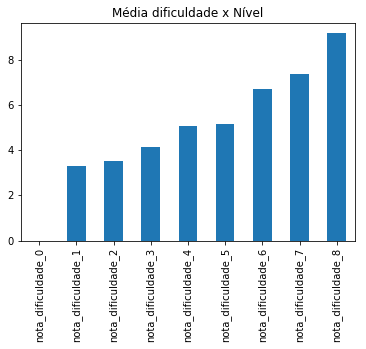

In [18]:
teste = pegaColunas(df_final, 'nota_dificuldade')


teste.mean().plot(kind='bar')
plt.title('Média dificuldade x Nível')

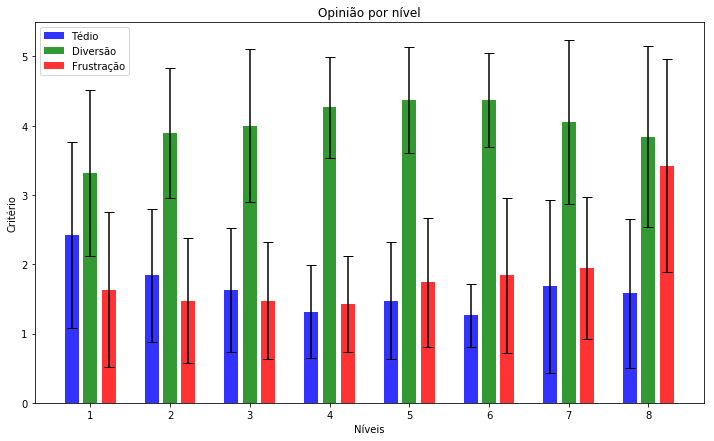

In [10]:
#Gerar gráfico de barrars nível x [tédio, diversão , frustração]

ted_col = pegaColunas(df_final, 'nivelTedioso')
div_col = pegaColunas(df_final, 'nivelDivertido')
frus_col = pegaColunas(df_final, 'nivelFrustrante')
#(ted.mean().values,div.mean().values,frus.mean().values)
#to-do, continuar desenvolvendo este gráfico.
#plt.figure(figsize=(20,20))
#pd.concat([ted,div,frus],axis=1).plot(kind='bar',)

ted = ted_col.mean().values[1:]
div = div_col.mean().values[1:]
frus = frus_col.mean().values[1:]

ted_error = ted_col.std().values[1:]
div_error = div_col.std().values[1:]
frus_error = frus_col.std().values[1:]

n_groups = 9

fig,ax = plt.subplots(figsize=(12, 7))
index = np.arange(n_groups)[1:]
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index + 0.12, ted , bar_width * 0.5 , alpha = opacity, color = 'b', label = 'Tédio', yerr = ted_error, capsize=5)

rects2 = plt.bar(index + bar_width  , div, bar_width * 0.5 , alpha = opacity , color='g', label = 'Diversão', yerr = div_error, capsize=5 )

rects3 = plt.bar(index  + bar_width * 2 - 0.12 , frus , bar_width  * 0.5 , alpha = opacity, color = 'r' , label = 'Frustração', yerr = frus_error, capsize=5)


plt.xlabel('Níveis')
plt.ylabel('Critério')
plt.title('Opinião por nível')
plt.xticks(index +  bar_width, (index))
plt.legend()
#fig.figure(figsize=(20,20))
#plt.tight_layout()
fig.savefig('OpiniaoXNivel.png')


In [11]:
def plotaColunaCheat(data, query):
    'retorna colunas com base em uma query'
    columns = [x for x in data.columns if query in x]
    
    values = data[columns]
    
    return values   

<BarContainer object of 8 artists>

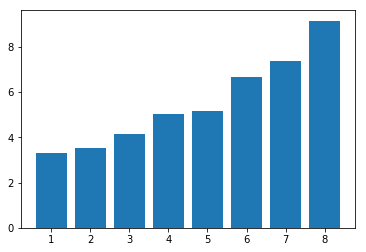

In [22]:
#teste.mean() 
x  = [ i for i in range (0,9)]


plt.bar(x[1:],teste.mean().values[1:]  )

[[1.         0.97059745]
 [0.97059745 1.        ]] 0.942059403421739


<Figure size 360x720 with 0 Axes>

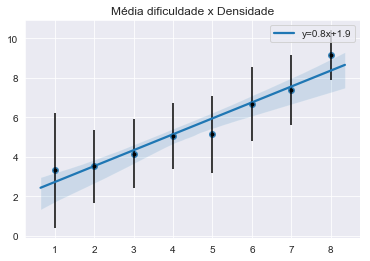

<Figure size 360x720 with 0 Axes>

In [23]:
teste = pegaColunas(df_final , 'nota_dificuldade')

plt.title('Média dificuldade x Densidade') 

x  = [ i for i in range (1, 9)]
sns.set_style("darkgrid")


slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,teste.mean().values[1:])

sns.regplot(x, teste.mean().values[1:] , marker='o', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}).legend()

plt.errorbar(x, teste.mean().values[1:], yerr=teste.std().values[1:], fmt='.k', );

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x, teste.mean().values[1:]), r2(x, teste.mean().values[1:]))
plt.figure(figsize=(5,10))

[[1.         0.58484744]
 [0.58484744 1.        ]] 0.34204653054169304


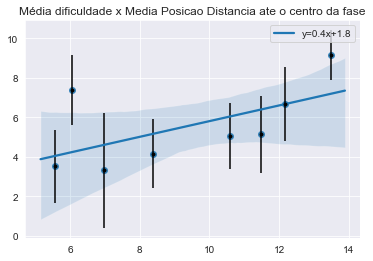

In [24]:
teste = pegaColunas(df_final , 'nota_dificuldade')

plt.title('Média dificuldade x Media Posicao Distancia ate o centro da fase') 

x  = [ 6.98, 5.56, 8.39, 10.58, 11.48, 12.18, 6.06, 13.48]
sns.set_style("darkgrid")


slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,teste.mean().values[1:])

sns.regplot(x, teste.mean().values[1:] , marker='o', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}).legend()

plt.errorbar(x, teste.mean().values[1:], yerr=teste.std().values[1:], fmt='.k', );

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x, teste.mean().values[1:]), r2(x, teste.mean().values[1:]))

[[1.         0.56060653]
 [0.56060653 1.        ]] 0.31427967735304224


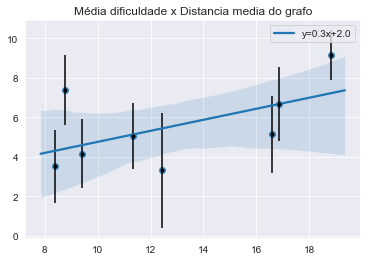

In [25]:
teste = pegaColunas(df_final , 'nota_dificuldade')

plt.title('Média dificuldade x Distancia media do grafo') 

x  = [ 12.45, 8.38, 9.4, 11.32, 16.58247, 16.86, 8.75 , 18.81]
sns.set_style("darkgrid")

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,teste.mean().values[1:])

sns.regplot(x, teste.mean().values[1:] , marker='o', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}).legend()

plt.errorbar(x, teste.mean().values[1:], yerr=teste.std().values[1:], fmt='.k', );

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x, teste.mean().values[1:]), r2(x, teste.mean().values[1:]))

[[1.         0.84118044]
 [0.84118044 1.        ]] 0.707584524289883


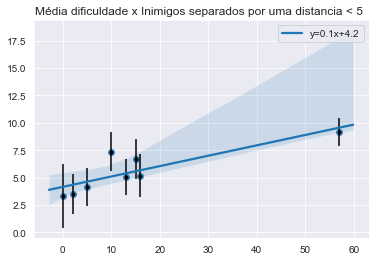

In [28]:
teste = pegaColunas(df_final , 'nota_dificuldade')

plt.title('Média dificuldade x Inimigos separados por uma distancia < 5 ') 

x  = [ 0 ,2 ,5 ,13 ,16 ,15 ,10,57]
sns.set_style("darkgrid")


slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,teste.mean().values[1:])

sns.regplot(x, teste.mean().values[1:] , marker='o', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}).legend()

plt.errorbar(x, teste.mean().values[1:], yerr=teste.std().values[1:], fmt='.k', );

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x, teste.mean().values[1:]), r2(x, teste.mean().values[1:]))

[[1.         0.80643462]
 [0.80643462 1.        ]] 0.6503367904580226


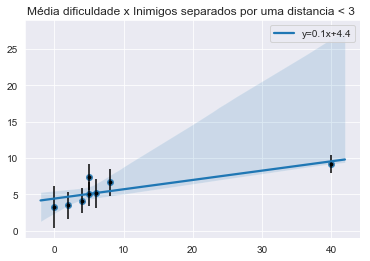

In [29]:
teste = pegaColunas(df_final , 'nota_dificuldade')

plt.title('Média dificuldade x Inimigos separados por uma distancia < 3 ') 

x  = [ 0 ,2 ,4 ,5,6 ,8 ,5,40]
sns.set_style("darkgrid")


slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,teste.mean().values[1:])

sns.regplot(x, teste.mean().values[1:] , marker='o', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}).legend()

plt.errorbar(x, teste.mean().values[1:], yerr=teste.std().values[1:], fmt='.k', );

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x, teste.mean().values[1:]), r2(x, teste.mean().values[1:]))

[[1.         0.83743417]
 [0.83743417 1.        ]] 0.701295981994218


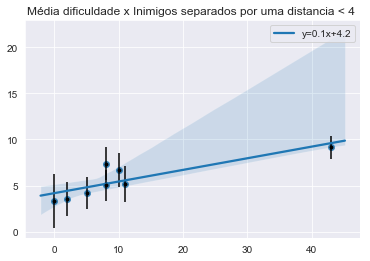

In [30]:
teste = pegaColunas(df_final , 'nota_dificuldade')

plt.title('Média dificuldade x Inimigos separados por uma distancia < 4 ') 

x  = [ 0 ,2 ,5 ,8, 11 ,10 ,8, 43]
sns.set_style("darkgrid")


slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,teste.mean().values[1:])

sns.regplot(x, teste.mean().values[1:] , marker='o', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}).legend()

plt.errorbar(x, teste.mean().values[1:], yerr=teste.std().values[1:], fmt='.k', );

#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x, teste.mean().values[1:]), r2(x, teste.mean().values[1:]))

[[1.         0.93787215]
 [0.93787215 1.        ]] 0.8796041661481797


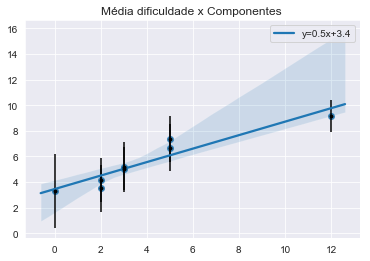

In [31]:
teste = pegaColunas(df_final , 'nota_dificuldade')

plt.title('Média dificuldade x Componentes ') 

x  = [ 0 ,2,2,3,3,5,5,12]
sns.set_style("darkgrid")


slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,teste.mean().values[1:])

sns.regplot(x, teste.mean().values[1:] , marker='o', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}).legend()

plt.errorbar(x, teste.mean().values[1:], yerr=teste.std().values[1:], fmt='.k', );



#correlacao linear
## dificuldade dependente === y depende de x??
## densidade variavel independente => x
print(np.corrcoef(x, teste.mean().values[1:]), r2(x, teste.mean().values[1:]))

No handles with labels found to put in legend.


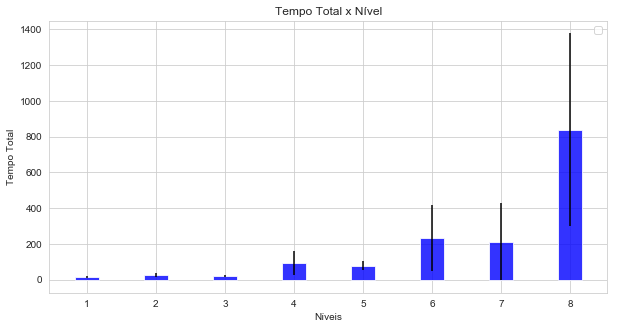

In [65]:
#Gerar gráfico de nivel x tempo medio total

tempo_total_col = pegaColunas(df_final, 'tempoTotal_')
tempo_total_mean = tempo_total_col.mean().values[1:]
tempo_total_std = tempo_total_col.std().values[1:]

n_groups = 9

fig,ax = plt.subplots(figsize=(10, 5))
index = np.arange(n_groups)[1:]
bar_width = 0.35
opacity = 0.8
sns.set_style("whitegrid")

rects1 = plt.bar(index  , tempo_total_mean , bar_width  , alpha = opacity, color = 'b', yerr = tempo_total_std)
plt.xlabel('Níveis')
plt.ylabel('Tempo Total')
plt.title('Tempo Total x Nível')
plt.xticks(index , (index))
plt.legend()
#fig.figure(figsize=(20,20))
#plt.tight_layout()
fig.savefig('tempoTotalXnivel.png')

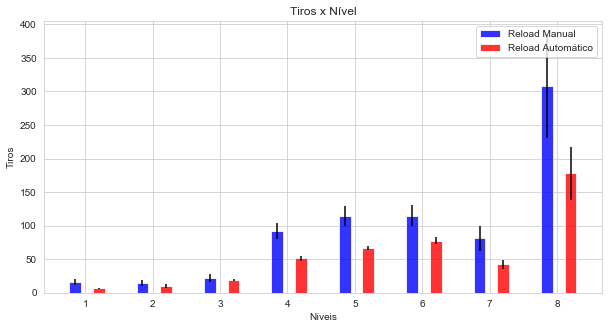

In [67]:
#Gerar gráfico de quantidade de reloads por nível

tiros_acer = pegaColunas(df_final, 'quantidadeTirosAcertadosCausandoDano')
tiros_err = pegaColunas(df_final, 'quantidadeTirosAcertadosSemCausarDano')

tiros_acer_mean = tiros_acer.mean().values[1:]
tiros_acer_std = tiros_acer.std().values[1:]

tiros_err_mean = tiros_err.mean().values[1:]
tiros_err_std = tiros_err.std().values[1:]

n_groups = 9

fig,ax = plt.subplots(figsize=(10, 5))
index = np.arange(n_groups)[1:]
bar_width = 0.35
opacity = 0.8
sns.set_style("whitegrid")

rects1 = plt.bar(index  , tiros_acer_mean , bar_width * 0.5 , alpha = opacity, color = 'b', label = 'Reload Manual' , yerr = tiros_acer_std)
rects2 = plt.bar(index  + bar_width , tiros_err_mean , bar_width * 0.5 , alpha = opacity,label = 'Reload Automático', color = 'r', yerr = tiros_err_std)
plt.xlabel('Níveis')
plt.ylabel('Tiros')
plt.title('Tiros x Nível')
plt.xticks(index + 0.15 , (index))
plt.legend()
#fig.figure(figsize=(20,20))
#plt.tight_layout()
fig.savefig('tirosAcerErroXnivel.png')

No handles with labels found to put in legend.


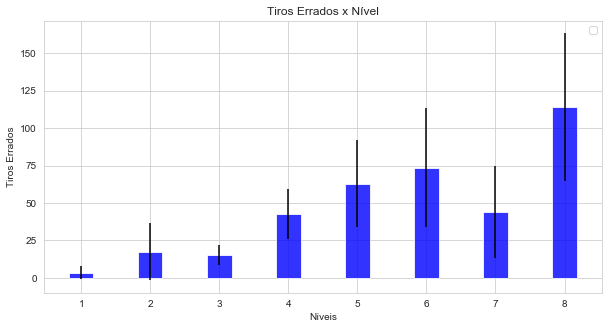

In [68]:
#nivel x de tiros que não acertaram inimigos;

tiros_err_col = pegaColunas(df_final, 'quantidadeTirosErrados_')
tiros_err_mean = tiros_err_col.mean().values[1:]
tiros_err_std = tiros_err_col.std().values[1:]

n_groups = 9

fig,ax = plt.subplots(figsize=(10, 5))
index = np.arange(n_groups)[1:]
bar_width = 0.35
opacity = 0.8
sns.set_style("whitegrid")

rects1 = plt.bar(index  , tiros_err_mean , bar_width  , alpha = opacity, color = 'b', yerr = tiros_err_std)
plt.xlabel('Níveis')
plt.ylabel('Tiros Errados')
plt.title('Tiros Errados x Nível')
plt.xticks(index , (index))
plt.legend()
#fig.figure(figsize=(20,20))
#plt.tight_layout()
fig.savefig('tirosErradosXnivel.png')

No handles with labels found to put in legend.


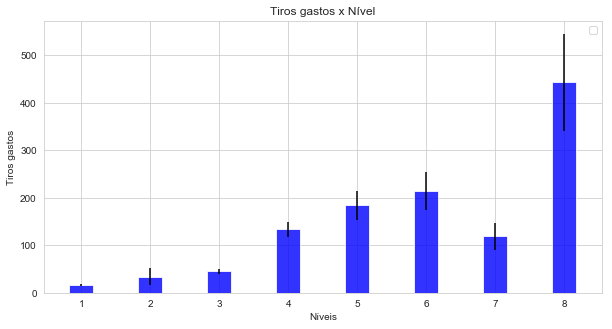

In [69]:
#nivel x  tiros gastos

col = pegaColunas(df_final, 'quantidadeTiros_')
col_mean = col.mean().values[1:]
col_std = col.std().values[1:]

n_groups = 9

fig,ax = plt.subplots(figsize=(10, 5))
index = np.arange(n_groups)[1:]
bar_width = 0.35
opacity = 0.8
sns.set_style("whitegrid")

rects1 = plt.bar(index  , col_mean , bar_width  , alpha = opacity, color = 'b', yerr = col_std)
plt.xlabel('Níveis')
plt.ylabel('Tiros gastos')
plt.title('Tiros gastos x Nível')
plt.xticks(index , (index))
plt.legend()
#fig.figure(figsize=(20,20))
#plt.tight_layout()
fig.savefig('tirosGastosXnivel.png')

No handles with labels found to put in legend.


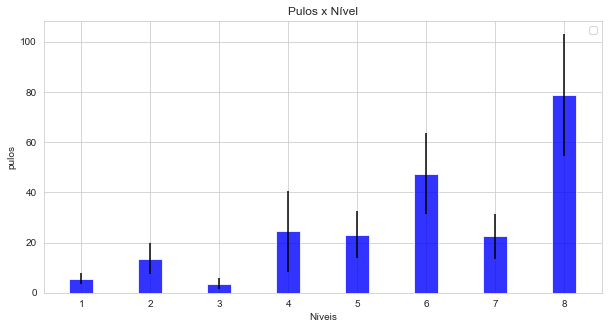

In [70]:
#nivel x  pulos

col = pegaColunas(df_final, 'quantidadePulos_')
col_mean = col.mean().values[1:]
col_std = col.std().values[1:]

n_groups = 9

fig,ax = plt.subplots(figsize=(10, 5))
index = np.arange(n_groups)[1:]
bar_width = 0.35
opacity = 0.8
sns.set_style("whitegrid")

rects1 = plt.bar(index  , col_mean , bar_width  , alpha = opacity, color = 'b', yerr = col_std)
plt.xlabel('Níveis')
plt.ylabel('pulos')
plt.title('Pulos x Nível')
plt.xticks(index , (index))
plt.legend()
#fig.figure(figsize=(20,20))
#plt.tight_layout()
fig.savefig('pulosXnivel.png')

No handles with labels found to put in legend.


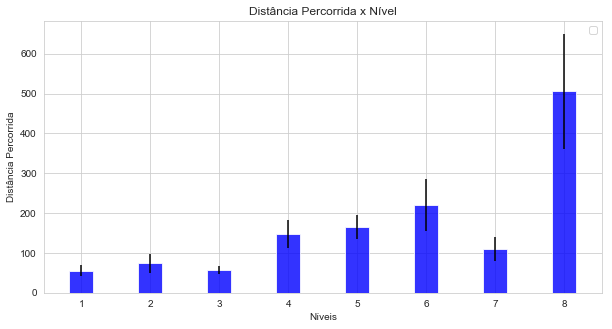

In [71]:
#nivel x  dist Perc

col = pegaColunas(df_final, 'distanciaPercorrida_')
col_mean = col.mean().values[1:]
col_std = col.std().values[1:]

n_groups = 9

fig,ax = plt.subplots(figsize=(10, 5))
index = np.arange(n_groups)[1:]
bar_width = 0.35
opacity = 0.8
sns.set_style("whitegrid")

rects1 = plt.bar(index  , col_mean , bar_width  , alpha = opacity, color = 'b', yerr = col_std)
plt.xlabel('Níveis')
plt.ylabel('Distância Percorrida')
plt.title('Distância Percorrida x Nível')
plt.xticks(index , (index))
plt.legend()
#fig.figure(figsize=(20,20))
#plt.tight_layout()
fig.savefig('dist_percXnivel.png')